# Property Price Prediction Project



## Problem Objective :
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

In [ ]:
import IPython 
IPython.display.Image('https://na.rdcpix.com/307f0bb1b63fb77c661794a66a6b500aw-c525726921rd-w628_h354_r4_q80.jpg')

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import streamlit as st
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.datasets import fetch_california_housing
warnings.filterwarnings('ignore')
print('Modules Loaded Successfully..!!')

Modules Loaded Successfully..!!


## Step 2: Load Data Create DF

In [ ]:
# Internet Required For This Code to Run
data_dict = fetch_california_housing()

data_dict.keys()

In [ ]:
print(data_dict['feature_names'])

In [ ]:
print(data_dict['target_names'])

In [ ]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']


print('Data Loaded Successfully!!')

## Step 3: Understand Data using EDA

In [ ]:
# Shape
df.shape

In [ ]:
# info
df.info()

In [ ]:
#checking null values
df.isna().sum()

In [ ]:
print(data_dict['DESCR'])

In [ ]:
# hundreds of thousands of dollars ($100,000) 1lakh Dollar
df.sample()

In [ ]:
# All data must be numerical, Dataset contains all values in numerical
# we can porceed this for Analysis

In [ ]:
#checking data distribution

sns.pairplot(data = df,corner = True)
plt.show()

In [ ]:
#checking data distribution

plt.title('Features vs Target Corr')
sns.heatmap(df.corr().round(2),annot = True, cmap = 'mako')
plt.show()

In [ ]:
# Data Describe
df.describe()

In [ ]:
plt.figure(figsize = (15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3, i+1)
    plt.hist(df[j],color = 'indigo', alpha = 0.6)
    plt.title(j + ' Analysis')
plt.show()

In [ ]:
# Distribution of target value Medhousevalue vs MedInc

sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc', color = 'indigo' )
plt.show()

In [ ]:

sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc', color = 'indigo' )
plt.show()

In [ ]:
plt.title('MedHouseVal Distribution ')
sns.histplot(data = df, x = 'MedHouseVal',kde = True, color = 'indigo' )
plt.show()

In [ ]:
df['MedHouseVal'].describe()
# 75 % of price less than 2.64 lakh dollars

## Step 4: Feature Engineering and Preprocessing

In [ ]:
# Convert data to Same Scale for Better prediction
# normalization = MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()
scaler.fit(X) # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')


In [ ]:
print(X_scaled.min())
print(X_scaled.max())

## Step 5: Train Test Split: Split Data for Training and Testing Part

In [ ]:
# Train Test Split: Divide into train part-test part
# Train Test Split: Func: divide
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size =.1, random_state = 40)
print('Done')

In [ ]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

In [ ]:
X_scaled.shape

## Step 6: Model Building

### Step 6.1: Linear Model Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

#### 6.1.2: Model Prediction

In [ ]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

In [ ]:
# 20%: Actual answer: y_test, Predicted: y_pred

lr_compare_df = pd.DataFrame({'Actual House Price': y_test,
             'Predicted House Price': y_pred})

print('Done')

In [ ]:
lr_compare_df


In [ ]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('LR_MAE',lr_mae)

In [ ]:
lr_mse = mean_squared_error(y_test,y_pred)
print('LR_MSE',lr_mse)

In [ ]:
lr_rmse = lr_mse**.5
print('LR_RMSE',lr_rmse)

In [ ]:
# Training Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score', lr_train_score)

# Testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('Testing Score', lr_test_score)

In [ ]:
# Model Score: apx: 60%,Model not that much good, we good, we need more parameter tuning
# Alternate Model Call: 
# fearture vs Feature high corr(X col:8)


In [ ]:
# VIF: Variance Inflation Factor > 10 we can drop that column
# Bais vs Variance Tradeoff: Intersect

# Underfit: Training->Low, Test->Low
# balancefit: Training->Good, Test->Good
# Overfit: Training->High, Test->Low

# Principal Component Analysis (PCA) is a dimensionality reduction technique
# PCA: imp Feature(cols) Find:(8:5 Imp)

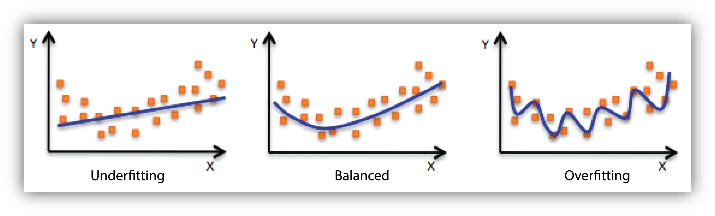

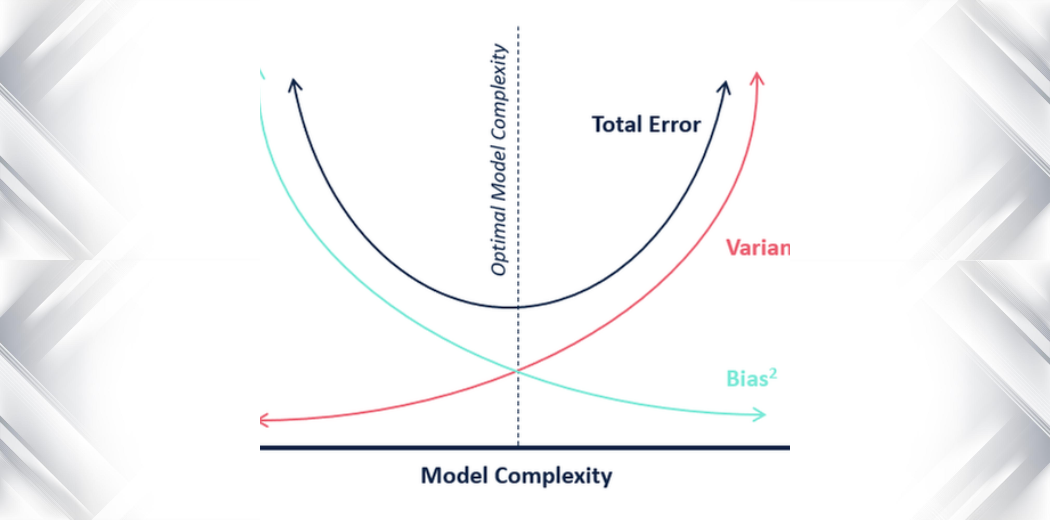 

#### Step 6.1.3: Checking VIF and Drop column if Value VIF>10 

In [ ]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_df['intercept'] = 1
X_train_df.sample()


In [ ]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range (X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending = False)

# Because Longitude and Latitude has high corr and vif close to 10 we can drop one or both

In [ ]:
col = list(X.columns)
col.remove('Latitude')

X_train_vif = X_train_df[col]
X_train_vif.sample()

In [ ]:
def built_model(ml_model, col):
    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]
    
    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]
    
    machine_model = ml_model()
    machine_model.fit(final_X_train, y_train)
    
    model_y_pred = machine_model.predict(final_X_test)
    
    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)
    
    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**5
    model_r2_score = r2_score(y_test,model_y_pred)
    
    model_metrics = {'Model Training Score': model_train_score,
                    'Model Test Score': model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Error':model_r2_score}
    
    model_matrix = pd.DataFrame(model_metrics,index = [1])
    return model_matrix,machine_model

In [ ]:
print(col)

In [ ]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [ ]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
ml_model = Lasso
# Lasso Regression not giving much score, so we can reject this model
built_model(ml_model,col)[0]

In [ ]:
ml_model = Ridge

built_model(ml_model,col)[0]


In [ ]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
    X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state = i,test_size =0.1)
    i+=1
    
    temp_df,final_model = built_model(Ridge,col)
    score = temp_df['Model Test Score'].values[0]
    
    print('Score is:',score)
    if score >= 0.60:
        print('Best random State',i)
        display(temp_df)
        break
        
    display(clear = True)

    

In [ ]:
final_model

## Step 7: Save Model & Extra Objects

In [ ]:
import pickle

with open('Property_Price_Prediction_Project.pkl','wb') as f:
    pickle.dump(final_model,f)
    
with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)
    
print('ML Model and Scaller Saved Successfully!!')

## Step 8: Website Building and Localhost Deployment

In [ ]:
#ML Model: Client:
# Website: Input Value: Prediction
# Website: Python: Django, Flask, Fastapi, : Streamlit
# Streamlit: Python Web based, Framework, Fast ML model test website
# Streamlit: Development + Deployment(For ML Engineeers) 

In [ ]:
#pip install streamlit

In [ ]:
import streamlit as s
print('Done')

In [ ]:
# st.title('California Housing Price Prediction')

In [ ]:
# !: Represents run this code in terminal 

In [ ]:
# !streamlit run house.py

In [62]:
import os
os.getcwd()

'C:\\Users\\Simran'

In [63]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [67]:
df.to_csv('california.csv')
print('Done')

Done


In [68]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])

    print('min',i,min_value)
    print('max',i,max_value)

    

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333


In [69]:
temp_df = pd.read_csv('california.csv')

for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])

# Step 9: Live Deployment Using Streamlit

In [70]:
#import streamlit as st
#import pandas as pd
#import random
#from sklearn.preprocessing import StandardScaler
#import pickle
#import time


In [71]:
# Github: Folder Housing Price Project
# requirements.txt = we will write those modules which is important for app.py to run 

In [72]:
pd.__version__

'2.2.3'

In [79]:
st.__version__

'1.45.1'